In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import numpy as np 


In [2]:
df = pd.read_csv('vectorized_data.zip')

sample_len = df[df['Assessment reports Score'] == 2].shape[0]

sample_3 = df[df['Assessment reports Score'] == 3].sample(n= sample_len)
sample_4 = df[df['Assessment reports Score'] == 4].sample(n= sample_len)

#concatenate the dataframes
df = pd.concat([df[df['Assessment reports Score'] == 2], sample_3, sample_4], axis=0)

In [3]:
# X exclude categorical data
X = df[['time_stamp','flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog',
       'smog_index', 'automated_readability_index', 'coleman_liau_index',
       'dale_chall_readability_score', 'linsear_write_formula', 'hdd', 'Summer', 'Dugast', 'words_count',
       'unique_words', 'ttr', 'rttr', 'cttr', 'mtld', 'herdan', 'maas', 
       'vec_1', 'vec_2', 'vec_3', 'vec_4', 'vec_5', 'vec_6', 'vec_7', 'vec_8',
       'vec_9', 'vec_10', 'vec_11', 'vec_12', 'vec_13', 'vec_14', 'vec_15',
       'vec_16', 'vec_17', 'vec_18', 'vec_19', 'vec_20']]
y = df['Assessment reports Score']
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [4]:
y.value_counts()

2    21104
3    21104
4    21104
Name: Assessment reports Score, dtype: int64

In [5]:
scaler = StandardScaler()

#Fit the StandardScaler to the training data
x_train = scaler.fit_transform(x_train)

# Apply the StandardScaler ti the test data
x_test = scaler.transform(x_test)

In [6]:
# turn the grade class from 1-5 to 0-4
y_train = y_train - 1
y_test = y_test -1

In [7]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=5) 
y_test = to_categorical(y_test, num_classes=5)

In [8]:
# import keras modules
from keras.models import Sequential
from keras.layers import Dense

In [28]:
from tensorflow.keras.layers import BatchNormalization
# define vars
input_num_units = 40
hidden1_num_units = 40
hidden2_num_units = 48
# hidden3_num_units = 500
# hidden4_num_units = 500
hidden5_num_units = 48
output_num_units = 5

epochs = 20
batch_size = 128

model = Sequential([
#  Dense(units=hidden1_num_units, input_dim=input_num_units, activation='relu', kernel_initializer='he_normal'),
#  BatchNormalization(),
 Dense(units=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'),
#  Dense(units=hidden5_num_units, input_dim=hidden4_num_units, activation='sigmoid'),
 Dense(units=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])


In [29]:
from keras.optimizers import SGD

model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

trained_model_5d = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

Epoch 1/20
  6/371 [..............................] - ETA: 4s - loss: 1.8411 - accuracy: 0.1784  

2023-03-29 22:32:20.324898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


371/371 [==============================] - ETA: 0s - loss: 1.1495 - accuracy: 0.4155

2023-03-29 22:32:23.894671: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


371/371 [==============================] - 5s 12ms/step - loss: 1.1495 - accuracy: 0.4155 - val_loss: 1.0595 - val_accuracy: 0.4498
Epoch 2/20
371/371 [==============================] - 4s 12ms/step - loss: 1.0520 - accuracy: 0.4489 - val_loss: 1.0481 - val_accuracy: 0.4528
Epoch 3/20
371/371 [==============================] - 4s 11ms/step - loss: 1.0420 - accuracy: 0.4546 - val_loss: 1.0397 - val_accuracy: 0.4607
Epoch 4/20
371/371 [==============================] - 4s 11ms/step - loss: 1.0367 - accuracy: 0.4598 - val_loss: 1.0389 - val_accuracy: 0.4612
Epoch 5/20
371/371 [==============================] - 5s 14ms/step - loss: 1.0337 - accuracy: 0.4633 - val_loss: 1.0361 - val_accuracy: 0.4618
Epoch 6/20
371/371 [==============================] - 4s 12ms/step - loss: 1.0308 - accuracy: 0.4654 - val_loss: 1.0349 - val_accuracy: 0.4649
Epoch 7/20
371/371 [==============================] - 5s 13ms/step - loss: 1.0291 - accuracy: 0.4678 - val_loss: 1.0347 - val_accuracy: 0.4641
Epoch 8/20

In [30]:
trained_model_5d.history

{'loss': [1.149543285369873,
  1.0520135164260864,
  1.0419822931289673,
  1.036696434020996,
  1.0337209701538086,
  1.0307849645614624,
  1.029081106185913,
  1.0278908014297485,
  1.0259917974472046,
  1.0247936248779297,
  1.0240157842636108,
  1.0226835012435913,
  1.0218600034713745,
  1.0217055082321167,
  1.0208016633987427,
  1.020015835762024,
  1.0196154117584229,
  1.0192627906799316,
  1.0188028812408447,
  1.0183898210525513],
 'accuracy': [0.4154873490333557,
  0.44893017411231995,
  0.45455312728881836,
  0.4598391354084015,
  0.4633139669895172,
  0.4654199481010437,
  0.46775758266448975,
  0.46729427576065063,
  0.47114819288253784,
  0.47119030356407166,
  0.47375959157943726,
  0.4731488823890686,
  0.47386491298675537,
  0.4726434350013733,
  0.47460198402404785,
  0.4760761857032776,
  0.47458094358444214,
  0.47462305426597595,
  0.4764973819255829,
  0.4773397445678711],
 'val_loss': [1.0594983100891113,
  1.0480693578720093,
  1.0397220849990845,
  1.038903236

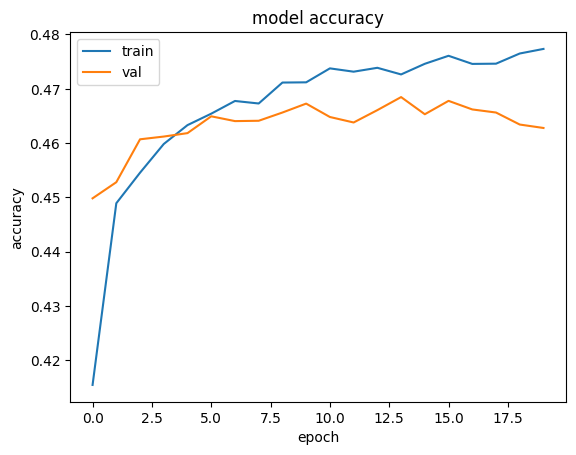

In [31]:
plt.plot(trained_model_5d.history['accuracy'])
plt.plot(trained_model_5d.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

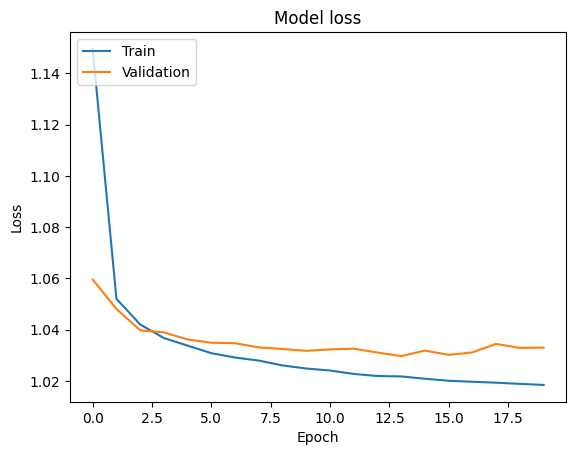

In [32]:
# Plot training & validation loss values
plt.plot(trained_model_5d.history['loss'])
plt.plot(trained_model_5d.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [33]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis = 1)

# Create a classification report using scikit-learn's classification_report function
target_names = ['2', '3', '4'] # replace with your own class names
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names))

 97/495 [====>.........................] - ETA: 0s

2023-03-29 22:33:47.186921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


495/495 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           2       0.51      0.46      0.49      5243
           3       0.42      0.44      0.43      5294
           4       0.47      0.49      0.48      5291

    accuracy                           0.46     15828
   macro avg       0.47      0.46      0.46     15828
weighted avg       0.47      0.46      0.46     15828

